##### 手动搭建深度神经网络（DNN）
- 定义网络结构
- 初始化模型参数
- 循环计算：前向传播/计算当前损失/反向传播/权值更新
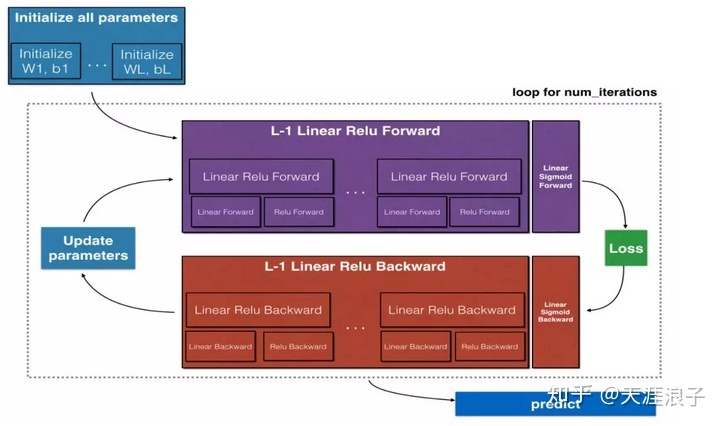


- 含L层的隐藏层深度神经网络
- 将网络结构作为参数传入初始化函数里

In [28]:
import numpy as np
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}    
    # number of layers in the network
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))  
      
    assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))        
    assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters
initialize_parameters_deep((2,3,4),)

{'W1': array([[ 0.01788628,  0.0043651 ],
        [ 0.00096497, -0.01863493],
        [-0.00277388, -0.00354759]]), 'b1': array([[0.],
        [0.],
        [0.]]), 'W2': array([[-0.00082741, -0.00627001, -0.00043818],
        [-0.00477218, -0.01313865,  0.00884622],
        [ 0.00881318,  0.01709573,  0.00050034],
        [-0.00404677, -0.0054536 , -0.01546477]]), 'b2': array([[0.],
        [0.],
        [0.],
        [0.]])}

- 将参数 layer_dims 定义为一个包含网络各层维数的 list 
- 使用随机数和归零操作来初始化权重 W 和偏置 b
- 指定一个输入层大小为 5 ，隐藏层大小为 4 ，输出层大小为 3 的神经网络

In [7]:
import numpy as np
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
# W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]  [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]  [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]  [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]] 
# b1 = [[0.]  [0.]  [0.]  [0.]] 
# W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]  [-0.01023785 -0.00712993  0.00625245 -0.00160513]  [-0.00768836 -0.00230031  0.00745056  0.01976111]] 
# b2 = [[0.]  [0.]  [0.]]

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


###### 前向传播
- 执行加权线性计算
- 对线性计算的结果进行激活函数处理



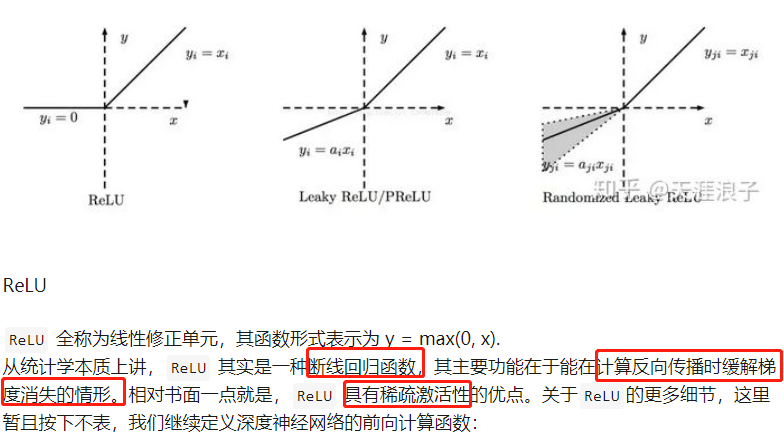

In [9]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)   
     
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)    
    return A, cache

- 参数 A_prev 为前一步执行前向计算的结果
- 中间使用了一个激活函数判断
- 包含L层采用 ReLU 作为激活函数，最后一层采用 sigmoid 激活函数

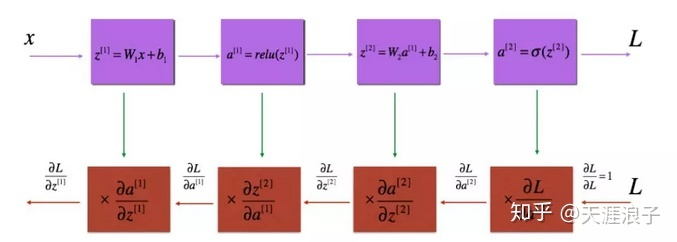

In [11]:
# 定义L层神经网络的前向计算函数为：

def L_model_forward(X, parameters):
    caches = []
    A = X    
    # number of layers in the neural network
    L = len(parameters) // 2                 

    # Implement [LINEAR -> RELU]*(L-1)
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)], "relu")
        caches.append(cache)    
    # Implement LINEAR -> SIGMOID
    AL, cache = linear_activation_forward(A, parameters["W"+str(L)], parameters["b"+str(L)], "sigmoid")
    caches.append(cache)    
    
    assert(AL.shape == (1,X.shape[1]))    
    return AL, caches

In [13]:
# 当前损失函数

def compute_cost(AL, Y):
    m = Y.shape[1]    
    # Compute loss from aL and y.
    cost = -np.sum(np.multiply(Y,np.log(AL))+np.multiply(1-Y,np.log(1-AL)))/m

    cost = np.squeeze(cost)  
       
    assert(cost.shape == ())    
    return cost

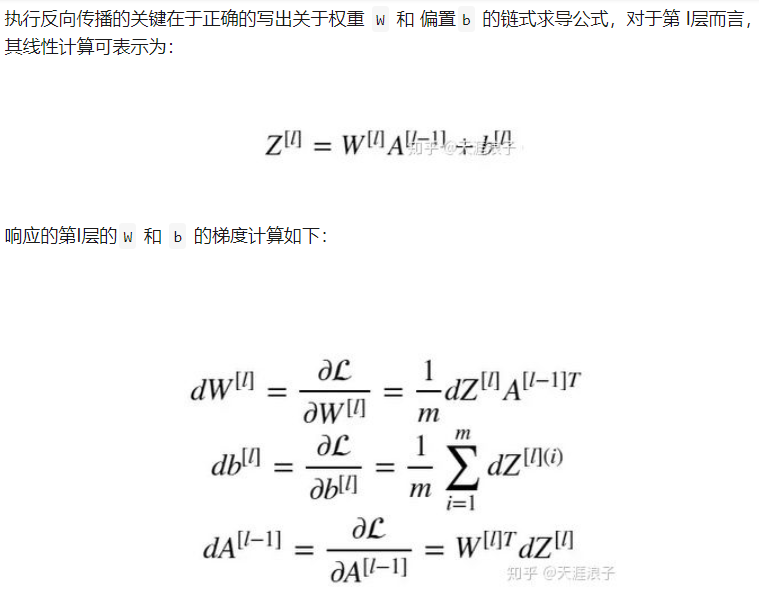

In [15]:
# 定义线性反向传播函数和线性激活反向传播函数如下：

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)    

    assert (dA_prev.shape == A_prev.shape)    
    assert (dW.shape == W.shape)    
    assert (db.shape == b.shape)    
    
    return dA_prev, dW, db
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)    
    return dA_prev, dW, db

In [17]:
# 定义L层网络的反向传播函数：

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) 
    # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))    
    # Lth layer (SIGMOID -> LINEAR) gradients
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")    
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, "relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp    
    return grads

In [20]:
# 权值更新-根据反向计算结果对权值参数进行更新

def update_parameters(parameters, grads, learning_rate):
    # number of layers in the neural network
    L = len(parameters) // 2 
    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W"+str(l+1)] - learning_rate*grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b"+str(l+1)] - learning_rate*grads["db"+str(l+1)]    
    return parameters

In [25]:
# 封装搭建

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []    

    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)    
    # Loop (gradient descent)
    for i in range(0, num_iterations):        
        # Forward propagation: 
        # [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID
        AL, caches = L_model_forward(X, parameters)        
        # Compute cost.
        cost = compute_cost(AL, Y)        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:            
            print ("Cost after iteration %i: %f" %(i, cost))        
            if print_cost and i % 100 == 0:
                costs.append(cost)    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()    
    
    return parameters